A1: Linear Modeling Case Study (Individual) - 
Computational Data Analytics with Python - DAT-5390 - MBAN
Tom Schmidt




Analysis Introduction:

The bike sharing industry has grown tremendously in recent years, with an estimated global value of $2.8 billion in 2023. There are several reasons for this development, starting with a growing awareness for sustainability, to physical interest and convenience. As a result of the market's growth, the Cook County Planning and Development Department, which is responsible for the Chicago metropolitan area in the US, wants to improve its understanding of the bike rental dynamics. They seek to benefit from developing a predictive model to forecast future bike rentals and aim to identify main factors behind the rental numbers.

This analysis will first explore and prepare the data provided before creating new features for the model. Following that, six several model types will be developed trying to achieve the best model.  

<h1>Import libraries and preparation</h1>

In [1005]:
## importing libraries ##

# for this template submission
import numpy                 as np                         # mathematical essentials
import pandas                as pd                         # data science essentials
import sklearn.linear_model                                # linear models
from sklearn.model_selection import train_test_split       # train/test split
import matplotlib.pyplot     as plt                        # essential graphical output
import seaborn               as sns                        # enhanced graphical output
# new libraries
from sklearn.preprocessing   import StandardScaler         # standard scaler
import warnings                                            # warnings from code
from sklearn.tree            import DecisionTreeRegressor  # DecisionTreeRegressor
from sklearn.linear_model    import Ridge, Lasso           # Ridge and Lasso Regression
from sklearn.linear_model    import SGDRegressor           # SGD Regressor
from sklearn.neighbors       import KNeighborsRegressor    # KNN
from sklearn.model_selection import RandomizedSearchCV    
from scipy.stats             import randint



# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1006]:
## importing data ##

# reading modeling data into Python
train_data = './datasets/train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = train_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

In [1007]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


In [1008]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

In [1009]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = "RENTALS"

<h1> Base Modeling (Data Exploration)</h1>

In [1010]:
# get the information for all variables
df_full.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 238.9+ KB


In [1011]:
# get the descriptive stats for the train dataset
df_full.describe().round(decimals = 3)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.000,2184.000,2184.000,2108.000,2117.000,2184.000,2184.000,2078.000,1638.000
mean,57.390,59.228,3.345,9.647,42.036,0.005,0.002,0.547,828.154
std,12.862,18.686,2.071,3.492,13.998,0.037,0.019,0.811,657.600
min,26.000,13.000,0.000,0.000,-2.200,0.000,0.000,0.000,0.000
25%,48.000,44.000,1.800,7.400,33.400,0.000,0.000,0.000,241.500
50%,57.000,59.000,2.900,11.700,41.900,0.000,0.000,0.000,761.500
75%,68.000,74.000,4.500,12.400,51.600,0.000,0.000,0.980,1203.750
max,91.000,97.000,12.800,12.400,75.000,0.710,0.300,3.180,3303.000


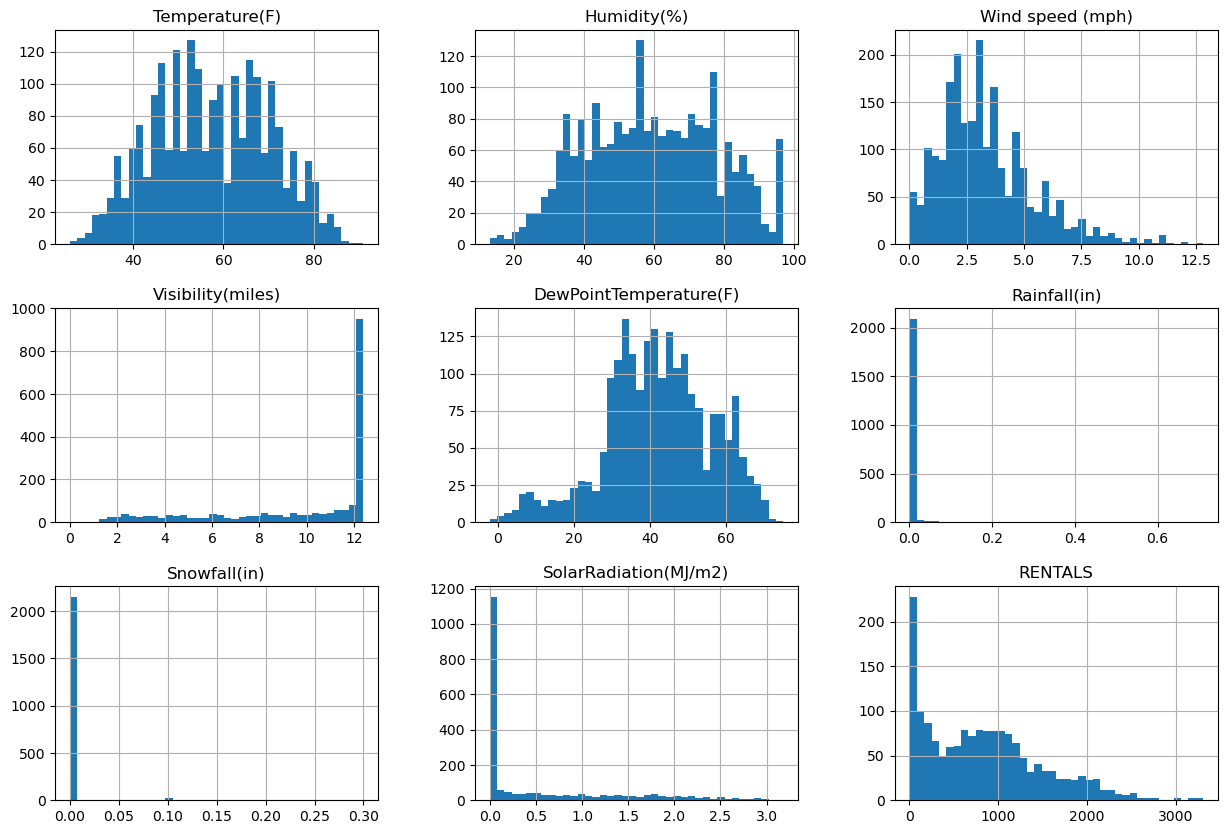

In [1012]:
# visualize all features in histograms
df_full.hist(figsize = (15,10),
             bins    = 40)
plt.show()

In the above visualized graphs I want to analyze histograms which represent several features and their individual distributions.

- The temperature histograms shows that its distribution is approximately normal. It is possible to say that it is slighty skewed to the right, which means there are more entries with higher temperatures than lower ones. 

- The humidity is also normally distributed. However, in this case it is slightly skewed to the left which indicates that there are less days with a lower humidity. 

- The wind speed is clearly right skewed. 

- The visibility histogram indicates that a high visibility is normal. 

- The dew point temperature is normally distributed but skewed to the left. 

- The rainfall histogram indicates that there is not much rain. 

- The snowfall is the same as rainfall. 

- The solar radiation is similar to the rainfall and snowfall. However, every now and then there are days with a higher solar radiation. 

- The rentals histogram shows that it is not normally distributed. It is right skewed. The histogram shows a long tail which offers the insight that there are days with exceptional high rental demands. 

In [1013]:
# look for na values
# get the total amount of na values in the excel file
missing_values_count = df_full.isna().sum()
missing_values_count

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

In [1014]:
# calculate the percentage of na values compared to all data
missing_percentage = (df_full.isna().sum() / len(df_train)) * 100
missing_percentage

DateHour                   0.000000
Temperature(F)             0.000000
Humidity(%)                0.000000
Wind speed (mph)           0.000000
Visibility(miles)          4.639805
DewPointTemperature(F)     4.090354
Rainfall(in)               0.000000
Snowfall(in)               0.000000
SolarRadiation(MJ/m2)      6.471306
Holiday                    0.000000
FunctioningDay             0.000000
RENTALS                   33.333333
set                        0.000000
dtype: float64

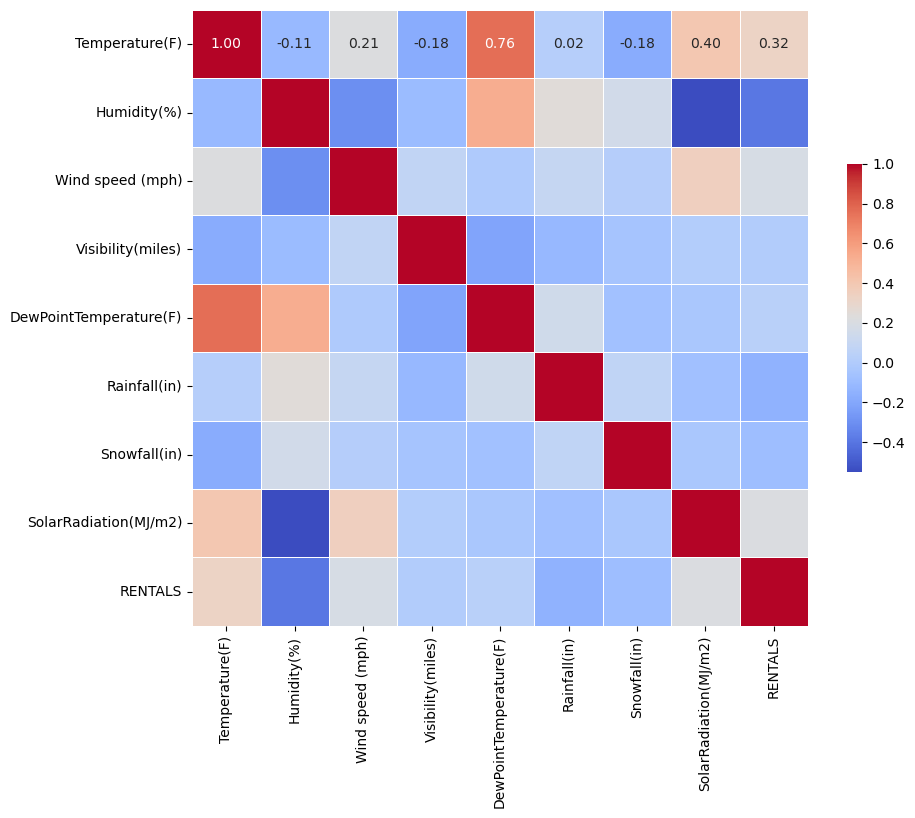

In [1015]:
# create a correlation heatmap to understand the correlations in the dataset

# first create another version of the dataset to drop string type columns ('df_train_special')
df_special = df_full.drop(['DateHour', 'Holiday', 'FunctioningDay', 'set'], axis=1)

# compute the correlation matrix
corr_matrix = df_special.corr()

# set up the matplotlib figure
plt.figure(figsize=(10, 8))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# show the plot 
plt.show()

/Users/ts/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ts/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


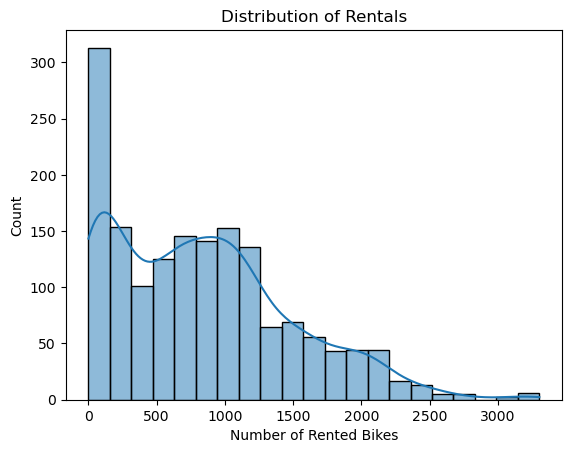

In [1016]:
# create a histogram to see the distribution of 'RENTALS'
# plotting 'RENTALS'
sns.histplot(x = 'RENTALS',
            data = df_special,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Rentals')
plt.xlabel(xlabel = 'Number of Rented Bikes')
plt.ylabel(ylabel = 'Count')


# displaying the plot
plt.show()

<h1> Handling Missing Values </h1>

In the context of Base Modeling (Data Exploration) I could identify the following three variables, that contain 
NA values: Visibility(miles), DewPointTemperature(F) and SolarRadiation(MJ/m2).
Thus, in the following part those NA values will be replaced by their median. 

In [1017]:
# Calculate the median visibility
median_visibility = df_full['Visibility(miles)'].median()

# Fill null values with the median visibility
df_full['Visibility(miles)'].fillna(value=median_visibility, inplace=True)


# Calculate the median DewPointTemperature
median_DewPointTemperature_F = df_full['DewPointTemperature(F)'].median()

# Fill null values with the median DewPointTemperature
df_full['DewPointTemperature(F)'].fillna(value=median_DewPointTemperature_F, inplace=True)


# Calculate the median SolarRadiation
median_solar_radiation = df_full['SolarRadiation(MJ/m2)'].median()

# Fill null values with the median SolarRadiation
df_full['SolarRadiation(MJ/m2)'].fillna(value=median_solar_radiation, inplace=True)

In [1018]:
# check again for NA Values
# get the total amount of na values in the excel file
missing_values_count = df_full.isna().sum()
missing_values_count

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)           0
DewPointTemperature(F)      0
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)       0
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

After checking that there are no further NA values in any columns other than RENTALS, we can end our data exploration part and continue to the analysis by developing new features.

<h1> Feature Engineering </h>

Since I found out that existing correlations are very low and do not help in our predictions, it is necessary to think of new features, which provide a higher correlation to the y-variable RENTALS. 
Therefore I have come up with the following:


1) Day of Week  as an extract weekday from the 'DateHour' column. This feature specifies the day of the week. However, it did turn out that it is not very helpful considering the low correlation. As a consequence of that the days were further divided into weekdays and weekends to differentiate between potential commutes and weekend trips. 

2) Weather Comfort Score including normalized values of temperature, humidity and solar radiation. This one provided the first noticeable correlation. I aimed to combine those three values as I assumed that these play a huge role in the people's demand to rent a bike. 

3) Functioning Day Numeric is the transformed version of Functioning Day. It is easier and better to include only numeric features. Therefore I had to transform the yes/no values to 1/0, where a yes became a 1 and a no became 0. This feature resulted in the strongest correlation so far. 

4) Weather Comfort Score Extended is the successor of the weather comfort score. The only thing that was changed is the addition of the previous feature 'FunctioningDayNumeric'. It turned out to be the best feature I could create. 

5) Hour as an extract Hour from 'DayHour' column to break down the datetime into hourly segments. It is really helpful to identify peak usage times and to understand user behaviors due to commuting patterns etc. 


<h2> Feature 1: Day of Week </h2>

In [1019]:
# Turning Series into DataFrame
df_full = pd.DataFrame(df_full)

In [1020]:
# Day of Week

# using a function to describe the structure of DateHour column as some time stamps 
# have miliseconds and others do not
def parse_datetime(x):
    try:
        return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f', errors='raise')
    except ValueError:
        return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S', errors='coerce')

# apply function
df_full['DateHour'] = df_full['DateHour'].apply(parse_datetime)

# extract the day of the week as an integer (Monday=0, ..., Sunday=6)
df_full['DayOfWeek'] = df_full['DateHour'].dt.dayofweek

# This one turned out to be not very helpful considering the low correlation
# Therefore in the following it will be divided into weekdays and weekends

# using another function to map to the desired numbering: 1-5 for weekdays, 6 or 7 for weekends
def map_to_weekday_weekend(day):
    if day in [5, 6]:   # Saturday or Sunday
        return 1        # Show 1 for Weekend
    else:
        return 0        # Show 0 for Weekday (Monday-Friday)

# apply function
df_full['WeekdayWeekend'] = df_full['DayOfWeek'].apply(map_to_weekday_weekend)

In [1021]:
# checking if the transformation to 1 for weekends and 0 for weekdays worked
df_full['WeekdayWeekend'].head(5)

ID
mb_1039    1
mb_1330    0
mb_551     1
mb_2103    0
mb_1430    0
Name: WeekdayWeekend, dtype: int64

<h2> Feature 4: Weather Comfort Score </h2>

In [1022]:
# Weather Comfort Score

# normalizing temperature, humidity, and solar radiation to have a common scale (0 to 1)
df_full['norm_temperature'] = (df_full['Temperature(F)'] - df_full['Temperature(F)'].min()) / (df_full['Temperature(F)'].max() - df_full['Temperature(F)'].min())
df_full['norm_humidity'] = (df_full['Humidity(%)'] - df_full['Humidity(%)'].min()) / (df_full['Humidity(%)'].max() - df_full['Humidity(%)'].min())
df_full['norm_solarRadiation'] = (df_full['SolarRadiation(MJ/m2)'] - df_full['SolarRadiation(MJ/m2)'].min()) / (df_full['SolarRadiation(MJ/m2)'].max() - df_full['SolarRadiation(MJ/m2)'].min())

# creating a composite score that combines these normalized variables
# assuming that for comfort while biking a higher temperature and solar radiation are positive, higher humidity is negative
df_full['weather_comfort_score'] = df_full['norm_temperature'] + df_full['norm_solarRadiation'] - df_full['norm_humidity']

# display the first few rows to verify the new feature
df_full[['Temperature(F)', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'weather_comfort_score']].head(n = 5)

,Temperature(F),Humidity(%),SolarRadiation(MJ/m2),weather_comfort_score
ID,,,,
mb_1039,52,81,0.00,-0.409524
mb_1330,51,53,1.01,0.226035
mb_551,56,49,0.00,0.032967
mb_2103,69,32,2.36,1.177486
mb_1430,53,20,1.96,0.948403


<h2> Feature 6: Functioning Day </h2>

In [1023]:
# Functioning Day

# convert Yes/No to 1/0
df_full['FunctioningDayNumeric'] = df_full['FunctioningDay'].map({'Yes': 1, 'No': 0})

<h2> Feature 5: Weather Comfort Score Extended </h2>

In [1024]:
# Weather Comfort Score Extended/Optimized

# normalizing temperature, humidity, and solar radiation to have a common scale (0 to 1)
df_full['norm_temperature'] = (df_full['Temperature(F)'] - df_full['Temperature(F)'].min()) / (df_full['Temperature(F)'].max() - df_full['Temperature(F)'].min())
df_full['norm_humidity'] = (df_full['Humidity(%)'] - df_full['Humidity(%)'].min()) / (df_full['Humidity(%)'].max() - df_full['Humidity(%)'].min())
df_full['norm_solarRadiation'] = (df_full['SolarRadiation(MJ/m2)'] - df_full['SolarRadiation(MJ/m2)'].min()) / (df_full['SolarRadiation(MJ/m2)'].max() - df_full['SolarRadiation(MJ/m2)'].min())
df_full['norm_FunctioningDayNumeric'] = (df_full['FunctioningDayNumeric'] - df_full['FunctioningDayNumeric'].min()) / (df_full['FunctioningDayNumeric'].max() - df_full['FunctioningDayNumeric'].min())

# creating a composite score that combines these normalized variables
# assuming that for comfort while biking a higher temperature and solar radiation are positive, higher humidity is negative
df_full['weather_comfort_score_extended'] = df_full['norm_temperature'] + df_full['norm_solarRadiation'] - df_full['norm_humidity'] + df_full['norm_FunctioningDayNumeric']

# display the first few rows to verify the new feature
df_full[['Temperature(F)', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'weather_comfort_score', 'FunctioningDayNumeric']].head(n = 5)

,Temperature(F),Humidity(%),SolarRadiation(MJ/m2),weather_comfort_score,FunctioningDayNumeric
ID,,,,,
mb_1039,52,81,0.00,-0.409524,1
mb_1330,51,53,1.01,0.226035,1
mb_551,56,49,0.00,0.032967,1
mb_2103,69,32,2.36,1.177486,0
mb_1430,53,20,1.96,0.948403,1


<h2> Feature 8: Hour </h2>

In [1025]:
# Hour
df_full['Hour'] = pd.DatetimeIndex(df_full['DateHour']).hour

<h2> Feature 9: Temperature Categories </h2>

In [1026]:
# Temperature Categories

# creating categories in a list that will be assigned to the temperatures 
temperature_labels = [0, 1, 2, 3, 4]

# divide the temperatures in 5 groups (with q=5) and assign the labels 
df_full['TemperatureCategory'] = pd.qcut(df_full['Temperature(F)'], 
                                         q = 5, 
                                         labels = temperature_labels)


<h2> Analyzing the correlation of new features </h2>

In [1027]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set', 'DayOfWeek', 'WeekdayWeekend', 'norm_temperature', 'norm_humidity', 'norm_solarRadiation', 'weather_comfort_score', 'FunctioningDayNumeric', 'norm_FunctioningDayNumeric', 'weather_comfort_score_extended', 'Hour', 'TemperatureCategory'], dtype='object')

In [1028]:
# analyzing the correlation of all new features with RENTALS
df_corr = df_full.corr(method       = 'spearman', # spearman is used because it does not need a normal distribution
                       min_periods  = 50,         # at least 50 observations should be used for calculating this correlation
                       numeric_only = True)       # only use numeric data

df_corr.loc[:,['RENTALS']].round(4)

,RENTALS
Temperature(F),0.2742
Humidity(%),-0.4117
Wind speed (mph),0.2101
Visibility(miles),-0.0033
DewPointTemperature(F),-0.0309
Rainfall(in),-0.2267
Snowfall(in),-0.0904
SolarRadiation(MJ/m2),0.3055
RENTALS,1.0000
DayOfWeek,0.1077


Those results show us that some of the newly created features have better correlation and will help us to predict
the model. The top 5 correlations are:

1) weather_comfort_score_extended (the optimized version of weather_comfort_score)
2) FunctioningDayNumeric
3) Hour
4) Humidity(%)
5) SolarRadiation(MJ/m2)

Those top 5 correlation are visualized in the next step. 



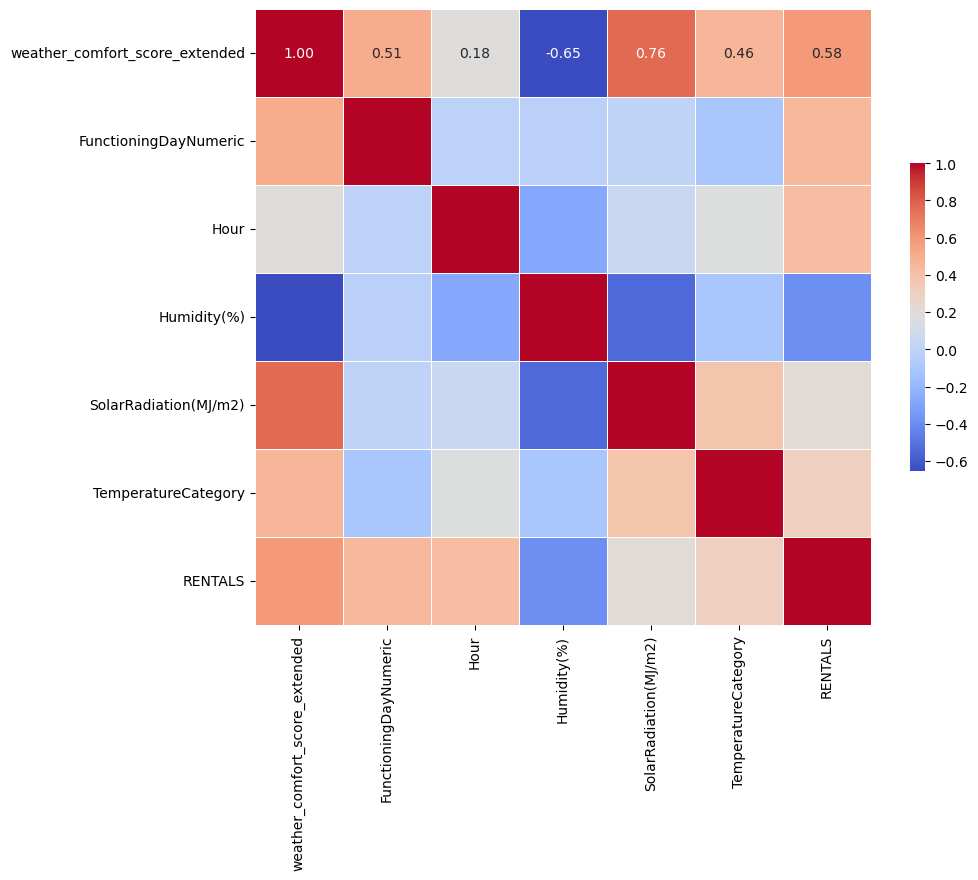

In [1029]:
# visualize correlations between new features and Rentals
df_full_newfeatures = df_full[['weather_comfort_score_extended', 'FunctioningDayNumeric', 'Hour', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'TemperatureCategory', 'RENTALS']]

# create a correlation matrix
corr_matrix = df_full_newfeatures.corr()

# set up the matplotlib figure
plt.figure(figsize=(10, 8))

# draw a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

<h1> Standardization </h1>

In [1030]:
# Standardization

# list of continuous features to standardize
continuous_features = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)',
                       'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)',
                       'FunctioningDayNumeric', 'weather_comfort_score_extended',
                       'DayOfWeek', 'Hour']

# initialize the StandardScaler
scaler = StandardScaler()

# fit the scaler to the continuous features and transform them
df_full[continuous_features] = scaler.fit_transform(df_full[continuous_features])

# see top 5 rows
df_full.head()

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set,DayOfWeek,WeekdayWeekend,norm_temperature,norm_humidity,norm_solarRadiation,weather_comfort_score,FunctioningDayNumeric,norm_FunctioningDayNumeric,weather_comfort_score_extended,Hour,TemperatureCategory
ID,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810,-0.419144,1.165364,-1.422139,-1.975852,0.317032,-0.130085,-0.108634,-0.651443,No,Yes,519.0,Not Kaggle,0.988788,1,0.400000,0.809524,0.000000,-0.409524,0.357095,1.0,-0.661727,-0.939175,1
mb_1330,2023-10-26 08:59:53.355,-0.496912,-0.333392,-0.552855,0.574230,-0.495855,-0.130085,-0.108634,0.612391,No,Yes,1251.0,Not Kaggle,-0.011218,0,0.384615,0.476190,0.317610,0.226035,0.357095,1.0,0.409181,-0.505740,1
mb_551,2023-09-23 21:59:57.250,-0.108071,-0.547500,-0.407974,-1.830961,-0.234570,-0.130085,-0.108634,-0.651443,No,Yes,1685.0,Not Kaggle,0.988788,1,0.461538,0.428571,0.000000,0.032967,0.357095,1.0,0.083864,1.372477,2
mb_2103,2023-12-19 14:00:00.000,0.902916,-1.457458,3.117455,0.777078,-0.241828,-0.130085,-0.108634,2.301674,No,No,0.0,Not Kaggle,-1.011224,0,0.661538,0.226190,0.742138,1.177486,-2.800376,0.0,0.327377,0.361129,3
mb_1430,2023-10-30 12:59:52.855,-0.341375,-2.099782,-0.214800,0.313426,-2.114371,-0.130085,-0.108634,1.801145,No,Yes,814.0,Not Kaggle,-1.511227,0,0.415385,0.083333,0.616352,0.948403,0.357095,1.0,1.626362,0.072173,1


# Data Partitioning

<h2> Separating Kaggle Data </h2>

In [1031]:
# parsing out testing data (needed for later)

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()

# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()

# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)

# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

<h2> Train-Test-Split </h2>

In [1032]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#

x_features = [ 'Temperature(F)', 
               'Humidity(%)', 
               #'Wind speed (mph)', 
               #'Snowfall(in)', 
               #'Visibility(miles)', 
               #'DewPointTemperature(F)', 
               #'Rainfall(in)', 
               'SolarRadiation(MJ/m2)',  
               'FunctioningDayNumeric', 
               'weather_comfort_score_extended',
               'Hour'
             ] 


By only selecting those 6 features, I could achieve the highest score. As soon as I include other features too
the score decreases. 

In [1033]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]

# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)

# storing remaining x_features after the step above
x_features = list(x_data.columns)

# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 23


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 6


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 6


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


<h1> Modeling </h1>

<h2> Linear Regression </h2>

In [1034]:
# naming the model
model_name = "Linear Regression1" # name your model

# model type
model = sklearn.linear_model.LinearRegression() # model type

In [1035]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
linear_reg_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(linear_reg_model)

Model Name:     Linear Regression1
Train_Score:    0.5553
Test_Score:     0.5154
Train-Test Gap: 0.0399



<h3> Model Results </h3>

In [1036]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

# checking results as related pairs  
for rel_pair in coefficient_lst:
    print(rel_pair)

('intercept', 822.7031)
('Temperature(F)', 168.6023)
('Humidity(%)', -141.5251)
('SolarRadiation(MJ/m2)', -140.8724)
('FunctioningDayNumeric', 226.4283)
('weather_comfort_score_extended', 170.4193)
('Hour', 179.1752)


<h3> Residual Analysis </h3>

In [1037]:
# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }

# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)

# checking results
model_resid_df.head(n = 10)

,True,Predicted
ID,,
mb_1509,908.0,1091.931417
mb_559,131.0,397.269604
mb_040,1208.0,1274.378663
mb_1346,291.0,422.355976
mb_1463,1433.0,1179.886034
mb_093,1930.0,1554.191339
mb_938,806.0,765.807353
mb_1785,260.0,89.993893
mb_2127,948.0,1051.946705


<h2> Lasso Regression </h2>

In [1038]:
# naming the model
model_name = "Lasso Regression1" # name your model

# model type
model = sklearn.linear_model.Lasso() # model type

In [1039]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results  
# that has been printed already (second time seems a bit uneccessary)
Lasso_reg_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(Lasso_reg_model)

Model Name:     Lasso Regression1
Train_Score:    0.5553
Test_Score:     0.5151
Train-Test Gap: 0.0402



<h3> Model Results </h3>

In [1040]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

# checking results as related pairs  
for rel_pair in coefficient_lst:
    print(rel_pair)

('intercept', 822.7162)
('Temperature(F)', 223.2594)
('Humidity(%)', -203.0054)
('SolarRadiation(MJ/m2)', -65.5279)
('FunctioningDayNumeric', 316.2215)
('weather_comfort_score_extended', 0.0)
('Hour', 179.0297)


<h3> Residual Analysis </h3>

In [1041]:
# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }

# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)

# checking results
model_resid_df.head(n = 10)

,True,Predicted
ID,,
mb_1509,908.0,1089.951278
mb_559,131.0,399.597969
mb_040,1208.0,1275.428786
mb_1346,291.0,422.631730
mb_1463,1433.0,1178.182190
mb_093,1930.0,1547.873246
mb_938,806.0,763.149681
mb_1785,260.0,96.193511
mb_2127,948.0,1055.653745


<h2> Ridge Regression </h2>

In [1042]:
# naming the model
model_name = "Ridge Regression1" # name your model

# model type
model = sklearn.linear_model.Ridge() # model type

In [1043]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# Creating a DataFrame with actual and predicted values
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': model_pred
})

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
Ridge_Reg_Model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(Ridge_Reg_Model)

Model Name:     Ridge Regression1
Train_Score:    0.5553
Test_Score:     0.5154
Train-Test Gap: 0.0399



<h3> Model Results </h3>

In [1044]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

# checking results as related pairs  
for rel_pair in coefficient_lst:
    print(rel_pair)

('intercept', 822.7034)
('Temperature(F)', 168.3498)
('Humidity(%)', -141.2915)
('SolarRadiation(MJ/m2)', -140.4612)
('FunctioningDayNumeric', 226.2681)
('weather_comfort_score_extended', 170.3362)
('Hour', 179.1286)


<h3> Residual Analysis </h3>

In [1045]:
# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }

# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)

# checking results
model_resid_df.head(n = 10)

,True,Predicted
ID,,
mb_1509,908.0,1091.683641
mb_559,131.0,397.527424
mb_040,1208.0,1274.462608
mb_1346,291.0,422.440110
mb_1463,1433.0,1179.574195
mb_093,1930.0,1553.350109
mb_938,806.0,765.472186
mb_1785,260.0,90.727619
mb_2127,948.0,1052.383586


<h3> Hyperparameter Tuning </h3>

In [1046]:
# Define the parameter grid for Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_regressor = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge_regressor, param_grid=ridge_params, cv=5)

# Fit the grid search to the data
ridge_grid_search.fit(x_train, y_train)

# Evaluate the model on test data
test_score = ridge_grid_search.best_estimator_.score(x_test, y_test)


# Print the best parameters and best score for Ridge Regression
print("Best parameters for Ridge Regression:", ridge_grid_search.best_params_)
print("Best train score for Ridge Regression:", ridge_grid_search.best_score_)
print(f"Test score for Ridge Regression: {test_score:.4f}")

Best parameters for Ridge Regression: {'alpha': 10}
Best train score for Ridge Regression: 0.551114887603261
Test score for Ridge Regression: 0.5150


<h2> Elastic Net Regression </h2>

In [1047]:
# naming the model
model_name = "Elastic Net Regression1" # name your model

elastic_net_model = SGDRegressor(penalty='elasticnet', l1_ratio=0.5)

In [1048]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
Elastic_Net_Model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(Elastic_Net_Model)

Model Name:     Elastic Net Regression1
Train_Score:    0.5553
Test_Score:     0.5154
Train-Test Gap: 0.0399



<h3> Model Results </h3>

In [1049]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))

# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]

# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

# checking results as related pairs  
for rel_pair in coefficient_lst:
    print(rel_pair)

('intercept', 822.7034)
('Temperature(F)', 168.3498)
('Humidity(%)', -141.2915)
('SolarRadiation(MJ/m2)', -140.4612)
('FunctioningDayNumeric', 226.2681)
('weather_comfort_score_extended', 170.3362)
('Hour', 179.1286)


<h3> Residual Analysis </h3>

In [1050]:
# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }

# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)

# checking results
model_resid_df.head(n = 10)

,True,Predicted
ID,,
mb_1509,908.0,1091.683641
mb_559,131.0,397.527424
mb_040,1208.0,1274.462608
mb_1346,291.0,422.440110
mb_1463,1433.0,1179.574195
mb_093,1930.0,1553.350109
mb_938,806.0,765.472186
mb_1785,260.0,90.727619
mb_2127,948.0,1052.383586


<h2> K-Nearest Neighbors </h2>

In [1051]:
# naming the model
model_name = "K-Nearest Neighbors1" # name your model

# Initializing the KNeighborsRegressor with default parameters
knn_model = KNeighborsRegressor()

# Assigning the initialized model to the 'model' variable
model = knn_model

In [1052]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     K-Nearest Neighbors1
Train_Score:    0.8563
Test_Score:     0.7806
Train-Test Gap: 0.0757



<h3> Model Results </h3>

In [1053]:
# Because this model doesn't have any coefficients or intercept attributes, 
# in this step I print the number of Neigbors 

# getting the number of neighbors used in the model
no_of_neighbors = model.n_neighbors

# printing out the model parameters
print(f"Number of Neighbors: {no_of_neighbors}")

Number of Neighbors: 5


<h3> Residual Analysis </h3>

In [1054]:
# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }

# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)

# checking results
model_resid_df.head(n = 10)

,True,Predicted
ID,,
mb_1509,908.0,766.4
mb_559,131.0,129.0
mb_040,1208.0,1479.0
mb_1346,291.0,511.2
mb_1463,1433.0,856.6
mb_093,1930.0,1488.8
mb_938,806.0,353.4
mb_1785,260.0,250.4
mb_2127,948.0,957.8


<h3> Hyperparameter Tuning </h3>

In [1055]:
# Define the model
knn = KNeighborsRegressor()

# Define the parameter distribution
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(20, 50),
    'p': [1, 2]
}

# Setup the randomized search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Best parameters: {'algorithm': 'brute', 'leaf_size': 22, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score: -94470.22362458945


This Model ("K-Nearest Neighbors1") is selected as the final model because of the best score. 

<h2> Decision Tree Regressor </h2>

In [1058]:
## Candidate Modeling ##

# naming the model
model_name = "Tree15" # name your model

# model type
model = sklearn.tree.DecisionTreeRegressor() # model type 

In [1059]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Tree15
Train_Score:    0.9994
Test_Score:     0.6186
Train-Test Gap: 0.3808



<h3> Model Results </h3>

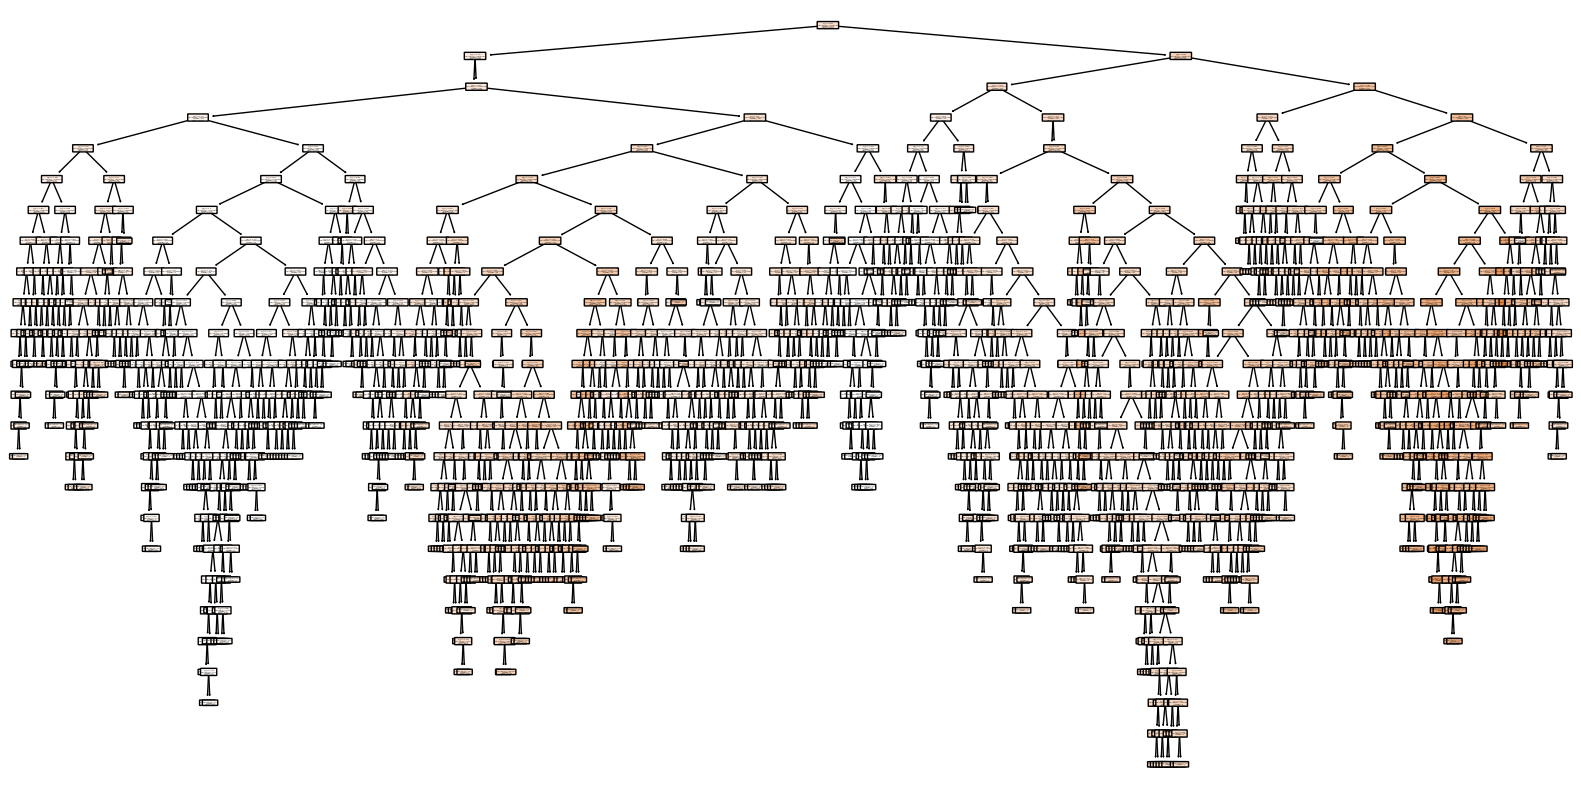

In [1060]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, rounded=True)
plt.show()


<h3> Residual Analysis </h3>

In [1061]:
# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }

# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)

# checking results
model_resid_df.head(n = 10)

,True,Predicted
ID,,
mb_1509,908.0,658.0
mb_559,131.0,72.0
mb_040,1208.0,1140.0
mb_1346,291.0,489.0
mb_1463,1433.0,1535.0
mb_093,1930.0,1776.0
mb_938,806.0,331.0
mb_1785,260.0,24.0
mb_2127,948.0,864.0


<h3> Hyperparameter Tuning </h3>

In [1062]:
from sklearn.metrics import r2_score

# Build three models with different hyperparameters
models = [
    DecisionTreeRegressor(max_depth=4, min_samples_split=30, min_samples_leaf=10, random_state=73),
    DecisionTreeRegressor(max_depth=7, min_samples_split=40, min_samples_leaf=15, random_state=73),
    DecisionTreeRegressor(max_depth=10, min_samples_split=50, min_samples_leaf=25, random_state=73)
]

# Train the models and evaluate them based on the test set
for model in models:
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = r2_score(y_test, model.predict(x_test))
    print(f"Model with max_depth={model.max_depth}, min_samples_split={model.min_samples_split}, min_samples_leaf={model.min_samples_leaf}")
    print(f"Train Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}\n")

Model with max_depth=4, min_samples_split=30, min_samples_leaf=10
Train Score: 0.7221
Test Score: 0.6558

Model with max_depth=7, min_samples_split=40, min_samples_leaf=15
Train Score: 0.7940
Test Score: 0.7358

Model with max_depth=10, min_samples_split=50, min_samples_leaf=25
Train Score: 0.7917
Test Score: 0.7383



In [1063]:
# naming the model
model_name = "Tuned Tree"


# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeRegressor(splitter="best",
                              min_samples_split = 50,
                              min_samples_leaf=25,
                              max_depth=10,
                              criterion="friedman_mse",
                              random_state=73)


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7917
Testing Score  : 0.7383
Train-Test Gap : 0.0534


<h2> Overview Model Results </h2>



1) Linear Regression
Model Name:     Linear Regression1
Train_Score:    0.5553
Test_Score:     0.5154
Train-Test Gap: 0.0399
    
2) Lasso Regression
Model Name:     Lasso Regression1
Train_Score:    0.5553
Test_Score:     0.5151
Train-Test Gap: 0.0402

3) Ridge Regression
Model Name:     Ridge Regression1
Train_Score:    0.5553
Test_Score:     0.5154
Train-Test Gap: 0.0399

4) Elastic Net Regression
Model Name:     Elastic Net Regression1
Train_Score:    0.5553
Test_Score:     0.5154
Train-Test Gap: 0.0399

5) K-Nearest Neighbors
Model Name:     K-Nearest Neighbors1
Train_Score:    0.8566
Test_Score:     0.7806
Train-Test Gap: 0.076

6) Decision Tree Regressor:
Model Name:     Tree15
Train_Score:    0.9994
Test_Score:     0.6423
Train-Test Gap: 0.3571



<h1> Creating Submission File for Kaggle </h1>

In [1056]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()

# y-data
y_data_kaggle = kaggle_data[y_variable]

# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

In [1064]:
## Kaggle Submission File ##

#!######################!#
#!# name the .csv file #!#
#!######################!#

# sending predictions to .csv
model_pred_df.to_csv(path_or_buf = "./model_output/KNN4.csv",
                     index       = True,
                     index_label = 'ID')